# Customer Analysis #
**Regression Model** 
<br>
*Data on the customers of a car insurance company*
<br>
*Goal is to predict future claim amount*

In [656]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import sys
# import statistics
import math

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

**Read data**

In [710]:
data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis_copy.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,NaN,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,NaN,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108.0,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106.0,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,02/03/2011,Employed,M,43836,Rural,Single,73.0,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [658]:
data.shape

(9134, 24)

In [659]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9132 non-null   f

**Standardize header names**

In [711]:
data = data.rename(columns={'Customer':'id', 'Customer Lifetime Value':'cust_ltv', 
                            'Months Since Last Claim':'months_last_cl',
                            'Months Since Policy Inception':'months_pol_inc'})

def col_names (data):
    """standardizes columns names: lowercase, removes spaces 
    at the beginning and at the end, replaces spaces with underscore"""
    cols = data.columns
    new_cols =[]
    for col in cols:
        new_col = col.lower().strip().replace(" ", "_")
        new_cols.append(new_col)
    data.columns = new_cols
    return

col_names(data)
data.head()

,id,state,cust_ltv,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_last_cl,months_pol_inc,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,NaN,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,NaN,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108.0,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106.0,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,02/03/2011,Employed,M,43836,Rural,Single,73.0,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


**Check and deal with NaN values**

In [661]:
data_copy = data.copy()
# data.isna().sum()/data.shape[0]*100
pd.DataFrame(round(data.isna().sum()/len(data),4)*100)

,0
id,0.00
state,0.00
cust_ltv,0.00
response,0.00
coverage,0.00
education,0.00
effective_to_date,0.00
employmentstatus,0.00
gender,0.00
income,0.00


In [662]:
mean_monthly_premium_auto = np.mean(data['monthly_premium_auto'])
data['monthly_premium_auto'] = data['monthly_premium_auto'].fillna(mean_monthly_premium_auto)
pd.DataFrame(round(data.isna().sum()/len(data),4)*100)

,0
id,0.0
state,0.0
cust_ltv,0.0
response,0.0
coverage,0.0
education,0.0
effective_to_date,0.0
employmentstatus,0.0
gender,0.0
income,0.0


**Check and change data format**

In [663]:
data.dtypes

id                            object
state                         object
cust_ltv                     float64
response                      object
coverage                      object
education                     object
effective_to_date             object
employmentstatus              object
gender                        object
income                         int64
location_code                 object
marital_status                object
monthly_premium_auto         float64
months_last_cl                 int64
months_pol_inc                 int64
number_of_open_complaints      int64
number_of_policies             int64
policy_type                   object
policy                        object
renew_offer_type              object
sales_channel                 object
total_claim_amount           float64
vehicle_class                 object
vehicle_size                  object
dtype: object

In [664]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'], errors='coerce')
data.dtypes

id                                   object
state                                object
cust_ltv                            float64
response                             object
coverage                             object
education                            object
effective_to_date            datetime64[ns]
employmentstatus                     object
gender                               object
income                                int64
location_code                        object
marital_status                       object
monthly_premium_auto                float64
months_last_cl                        int64
months_pol_inc                        int64
number_of_open_complaints             int64
number_of_policies                    int64
policy_type                          object
policy                               object
renew_offer_type                     object
sales_channel                        object
total_claim_amount                  float64
vehicle_class                   

**Categorical Features / Numerical Features**

In [665]:
# type(data.select_dtypes('object'))
numericals = data.select_dtypes(include=[np.number])
categoricals = data.select_dtypes(include=[np.object])

print(categoricals.shape)
print(numericals.shape)

(9134, 15)
(9134, 8)


**Exploration**
<br>
*Distribution, multicollinearity, outliers*

In [666]:
data.describe(include='all')

,id,state,cust_ltv,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_last_cl,months_pol_inc,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
count,9134,9134,9134.000000,9134,9134,9134,9134,9134,9134,9134.000000,9134,9134,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134
unique,9134,5,NaN,2,3,5,59,5,2,NaN,3,3,NaN,NaN,NaN,NaN,NaN,3,9,4,4,NaN,6,3
top,BD66455,California,NaN,No,Basic,Bachelor,2011-01-10 00:00:00,Employed,F,NaN,Suburban,Married,NaN,NaN,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize
freq,1,3150,NaN,7826,5568,2748,195,5698,4658,NaN,5779,5298,NaN,NaN,NaN,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424
first,NaN,NaN,NaN,NaN,NaN,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2011-02-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,8004.940475,NaN,NaN,NaN,NaN,NaN,NaN,37657.380009,NaN,NaN,93.221857,15.097000,48.064594,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN,NaN
std,NaN,NaN,6870.967608,NaN,NaN,NaN,NaN,NaN,NaN,30379.904734,NaN,NaN,34.407033,10.073257,27.905991,0.910384,2.390182,NaN,NaN,NaN,NaN,290.500092,NaN,NaN
min,NaN,NaN,1898.007675,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,61.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN
25%,NaN,NaN,3994.251794,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,68.000000,6.000000,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN,NaN


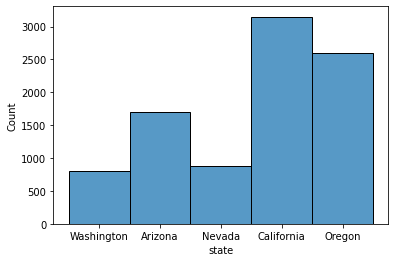

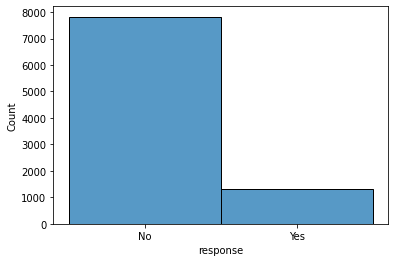

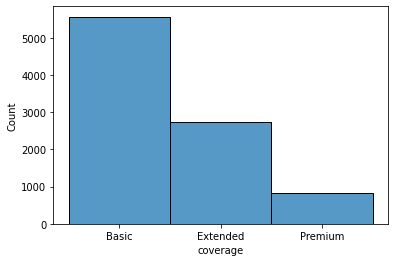

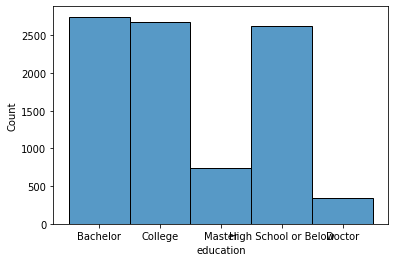

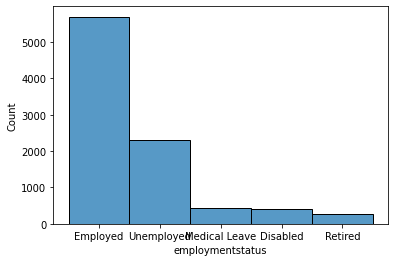

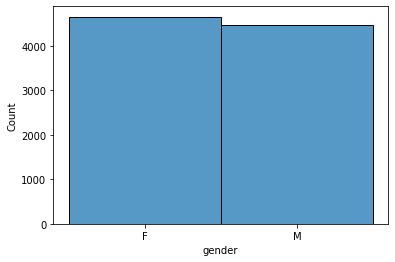

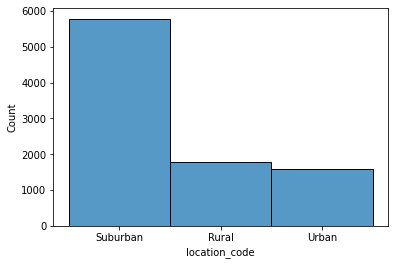

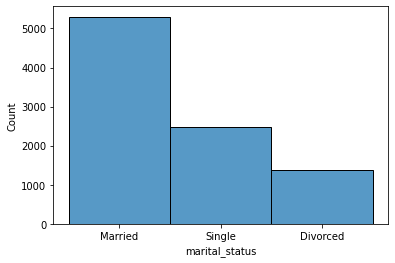

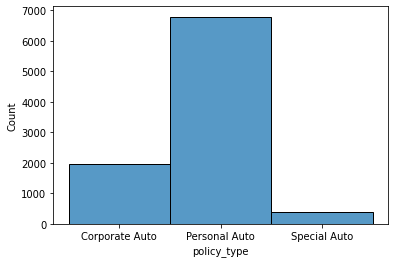

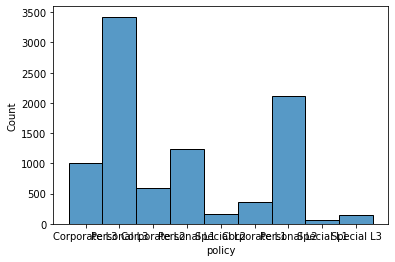

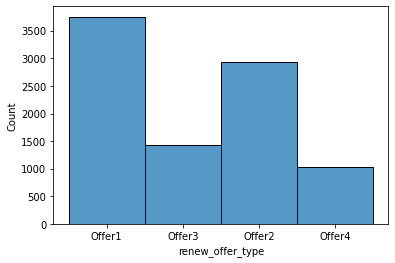

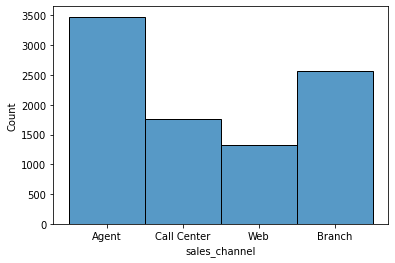

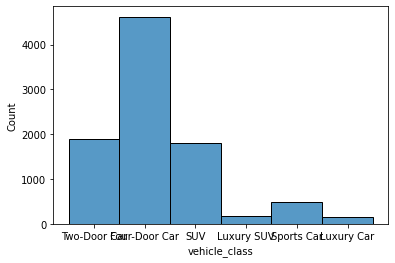

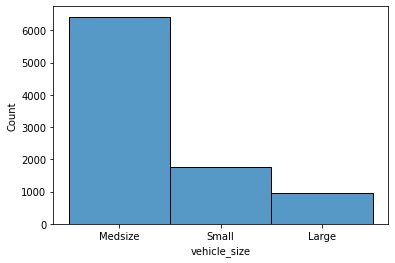

In [668]:
categoricals_copy = categoricals.drop(['id'], axis = 1)

categoricals_copy.head()

for i in range(categoricals_copy.shape[1]):
    sns.histplot(categoricals_copy[categoricals_copy.columns[i]], bins=40)
    plt.show()

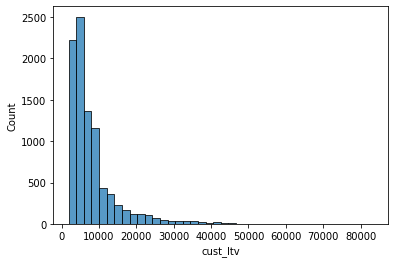

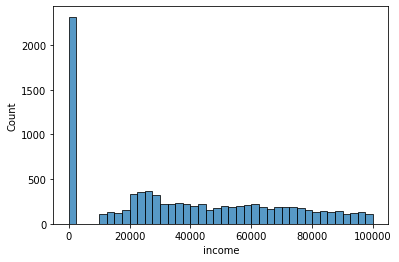

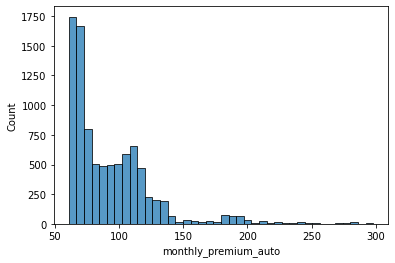

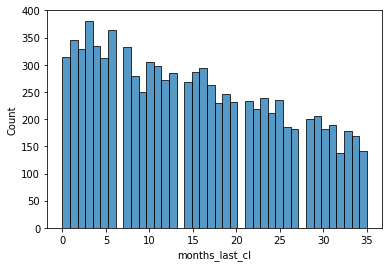

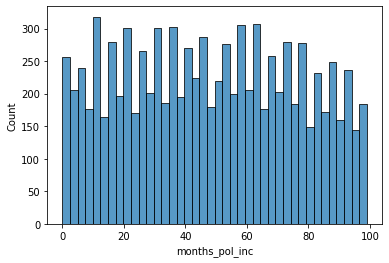

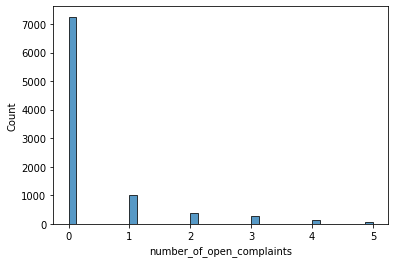

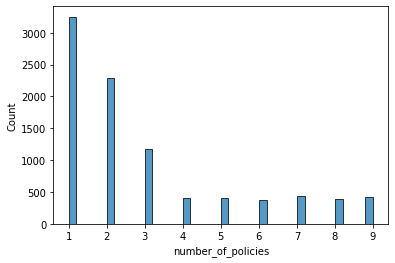

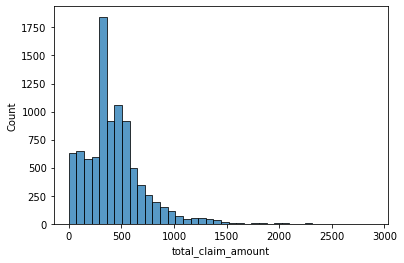

In [669]:
for i in range(numericals.shape[1]):
    sns.histplot(numericals[numericals.columns[i]], bins=40)
    plt.show()

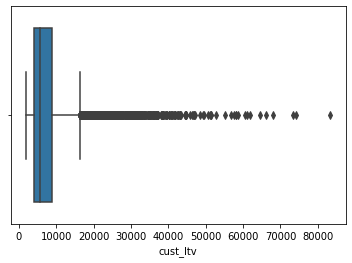

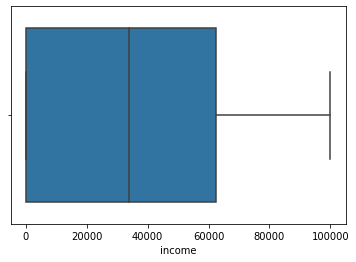

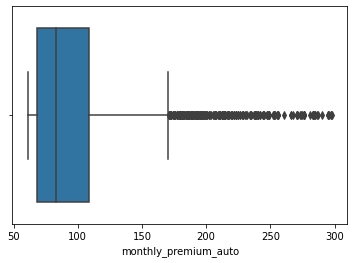

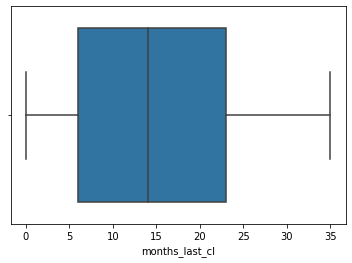

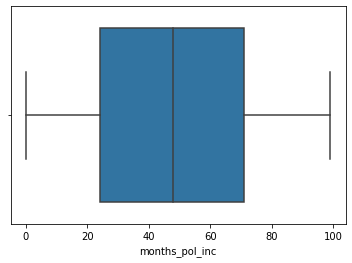

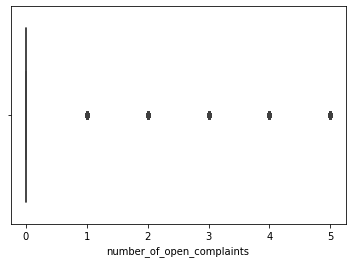

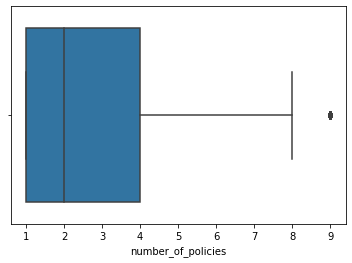

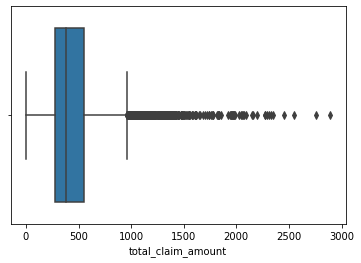

In [670]:
# sns.boxplot(y=numericals['income'], data=numericals)
for i in range(numericals.shape[1]):
    sns.boxplot(numericals[numericals.columns[i]])
    plt.show()

*Numerical variables, multicollinearity*

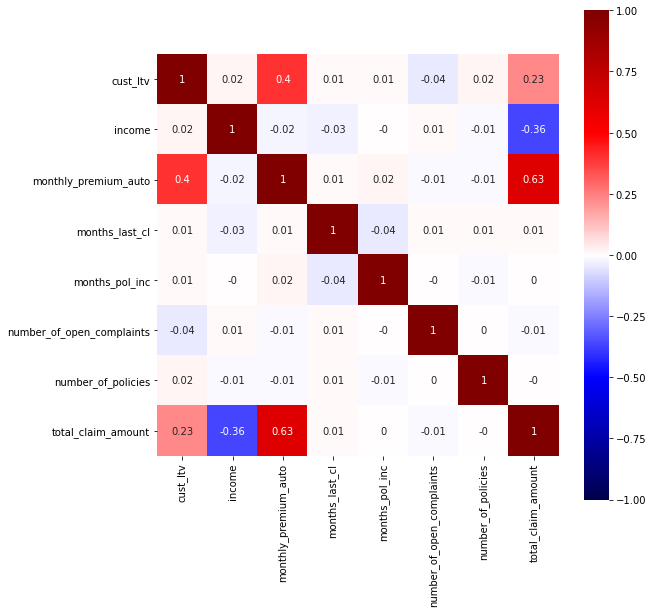

In [671]:
plt.figure(figsize=(9,9))
sns.heatmap(numericals.corr().round(2),vmin=-1, vmax=1, center=0, annot = True,square=True, cmap='seismic')
plt.show()

*Categorical variables, multicollinearity*

In [672]:
# policy_type - policy

print(data['policy'].unique())
print(data['policy_type'].unique())
print()

corporate = data[(data['policy_type'] == 'Corporate Auto')]
print(corporate['policy'].unique())
print()

personal = data[(data['policy_type'] == 'Personal Auto')]
print(personal['policy'].unique())
print()

special = data[(data['policy_type'] == 'Special Auto')]
print(special['policy'].unique())

data = data.drop(['policy_type'], axis =1)

['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
['Corporate Auto' 'Personal Auto' 'Special Auto']

['Corporate L3' 'Corporate L2' 'Corporate L1']

['Personal L3' 'Personal L1' 'Personal L2']

['Special L2' 'Special L1' 'Special L3']


*Categoricals-numericals multicollinearity*

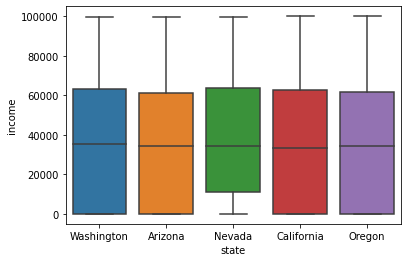

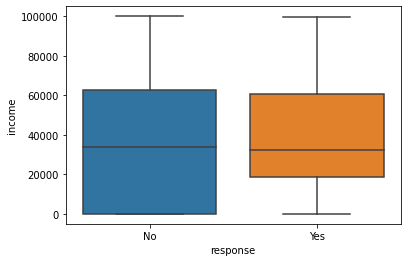

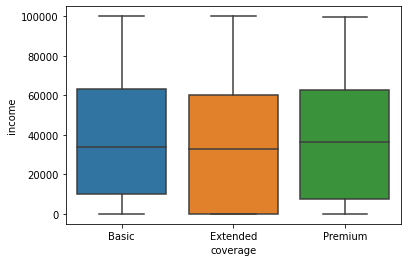

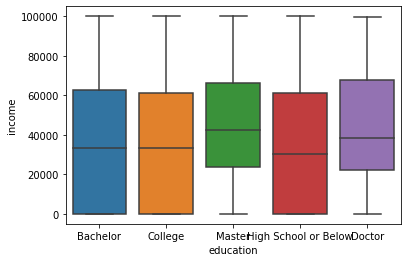

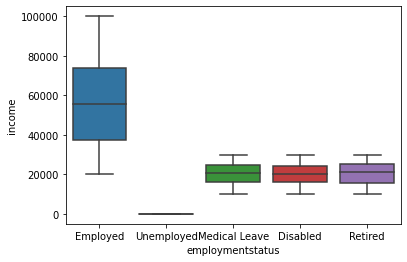

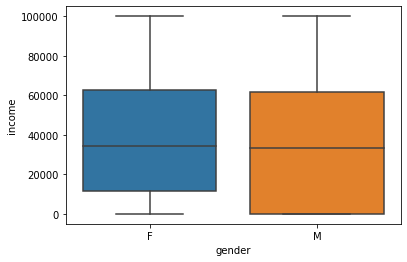

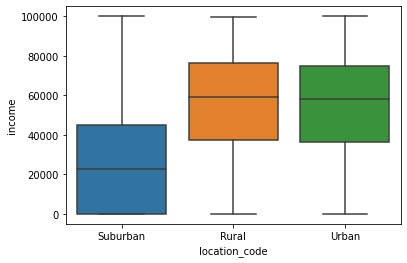

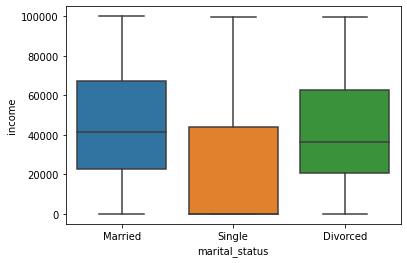

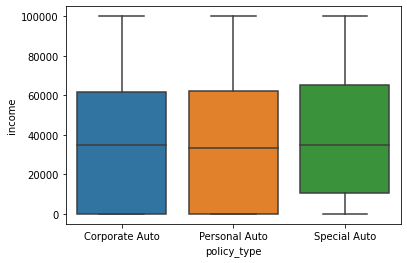

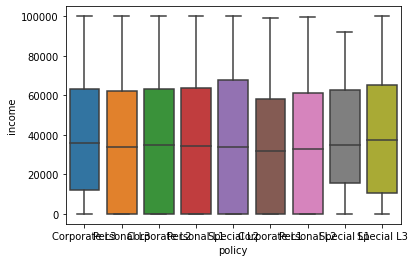

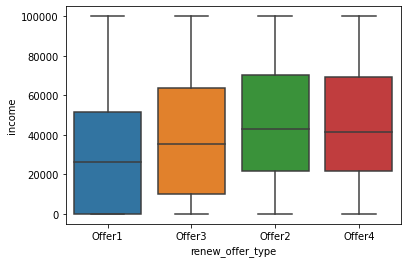

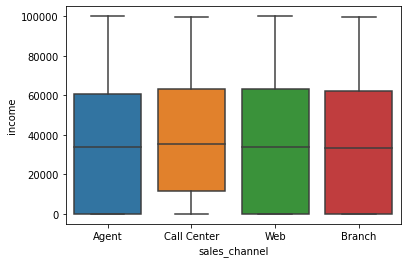

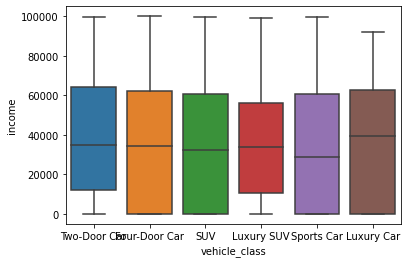

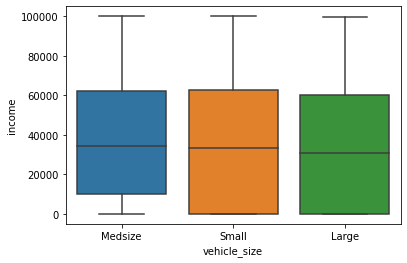

In [718]:
cat = categoricals.drop(['id'], axis=1)

for i in cat:
    sns.boxplot(x=i, y="income", data = data)
    plt.show()

In [713]:
# income - employment

data['employmentstatus'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [674]:
unempl_count = data[(data['employmentstatus'] == 'Unemployed') & (data['income'] == 0)]

print(unempl_count.shape[0])

2317


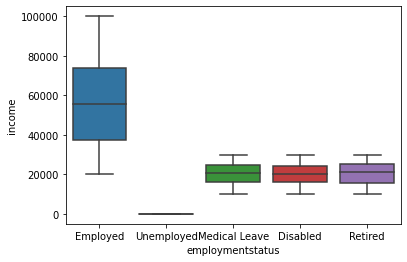

In [675]:
sns.boxplot(x="employmentstatus", y="income", data = data)
plt.show()

data = data.drop(['employmentstatus'], axis =1)

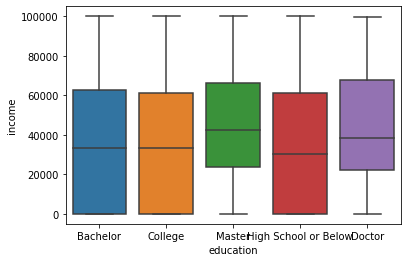

In [676]:
# income - education

sns.boxplot(x="education", y="income", data = data)
plt.show()

In [677]:
x = data['education'].unique()
for i in x:
    i = i.lower().replace(' ','_')


for i in x:
    ii = data[(data['education'] == i)]
    mean = np.sum(ii['income'])/ii.shape[0]
    print (i, ' mean income = ', mean)
    
data = data.drop(['education'], axis = 1)

Bachelor  mean income =  37426.81477438137
College  mean income =  37357.16598284222
Master  mean income =  44768.187584345476
High School or Below  mean income =  35583.92944317315
Doctor  mean income =  42353.12865497076


In [679]:
x = data['coverage'].unique()
for i in x:
    i = i.lower().replace(' ','_')

for i in x:
    ii = data[(data['coverage'] == i)]
    mean = np.sum(ii['income'])/ii.shape[0]
    print (i, ' mean income = ', mean)

Basic  mean income =  38145.83477011494
Extended  mean income =  36380.09992706054
Premium  mean income =  38607.12014563107


**Dealing with outliers**
<br>
*Variables with outliers were identified by means of boxplots*

In [680]:
def log_transform_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN

data['cust_ltv_log'] = list(map(log_transform_clean, data['cust_ltv']))

In [681]:
# replace the NaNs after the log transformation
# replace outliers after the transformation if needed

# iqr = np.percentile(data['customer_lifetime_value'],75) - np.percentile(data['customer_lifetime_value'],25)
# upper_limit = np.percentile(data['customer_lifetime_value'],75) + 1.5*iqr
# lower_limit = np.percentile(data['customer_lifetime_value'],25) - 1.5*iqr

# data = data[(data['customer_lifetime_value']>lower_limit) & (data['customer_lifetime_value']<upper_limit)]

# data.shape

In [682]:
from scipy import stats

data['cust_ltv_box'] = np.where(data['cust_ltv']<=0,0,data['cust_ltv'])
mean = np.sum(data['cust_ltv_box'])/len(data[data['cust_ltv_box']>0])
data['cust_ltv_box'] = data['cust_ltv_box'].replace(0,mean)

xt, lmbda = stats.boxcox(data['cust_ltv_box'])

data['cust_ltv_box'] = xt

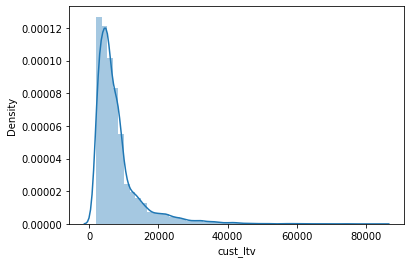

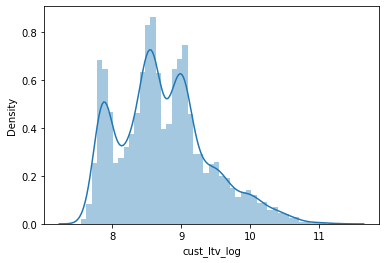

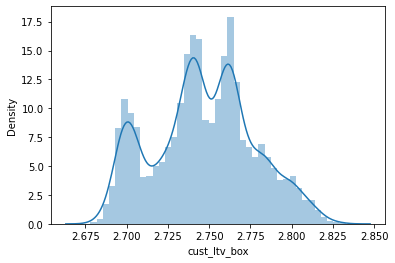

In [683]:
sns.distplot(data['cust_ltv'])
plt.show()

sns.distplot(data['cust_ltv_log'])
plt.show()

sns.distplot(data['cust_ltv_box'])
plt.show()

In [684]:
data_transf = data.drop(['cust_ltv', 'cust_ltv_log'], axis=1)

data_transf.head()
data_transf.shape

(9134, 21)

In [685]:
data_transf['monthly_prem_box'] = np.where(data_transf['monthly_premium_auto']<=0,0,data_transf['monthly_premium_auto'])
mean = np.sum(data_transf['monthly_prem_box'])/len(data_transf[data_transf['monthly_prem_box']>0])
data_transf['monthly_prem_box'] = data_transf['monthly_prem_box'].replace(0,mean)

xt2, lmbda = stats.boxcox(data_transf['monthly_prem_box'])

data_transf['monthly_prem_box'] = xt2

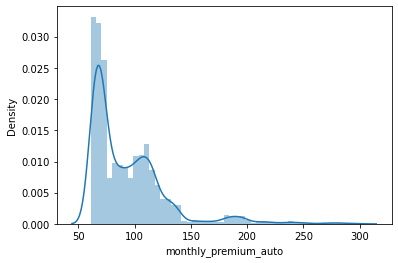

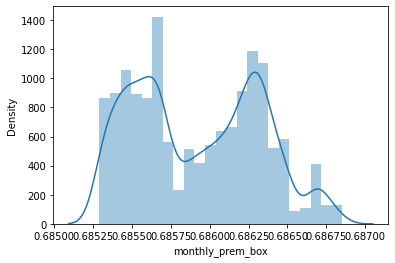

In [686]:
sns.distplot(data_transf['monthly_premium_auto'])
plt.show()

sns.distplot(data_transf['monthly_prem_box'])
plt.show()

In [687]:
data_transf = data_transf.drop(['monthly_premium_auto'], axis=1)
data_transf.shape

(9134, 21)

**Normalization of numerical variables**

In [688]:
X_num = data_transf.select_dtypes(include = np.number)
X_cat = data_transf.select_dtypes(include = np.object)

X_num.head()

,income,months_last_cl,months_pol_inc,number_of_open_complaints,number_of_policies,total_claim_amount,cust_ltv_box,monthly_prem_box
0,56274,32,5,0,1,384.811147,2.703839,0.686090
1,0,13,42,0,8,1131.464935,2.754926,0.686090
2,48767,18,38,0,2,566.472247,2.780772,0.686270
3,0,18,65,0,7,529.881344,2.759125,0.686249
4,43836,12,44,0,1,138.130879,2.704995,0.685691


In [689]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X_num)
X_num_normalized = transformer.transform(X_num)
X_num_normalized = pd.DataFrame(X_num_normalized)

X_num_normalized.head()

,0,1,2,3,4,5,6,7
0,0.999976,0.000569,0.000089,0.0,0.000018,0.006838,0.000048,0.000012
1,0.000000,0.011481,0.037091,0.0,0.007065,0.999218,0.002433,0.000606
2,0.999932,0.000369,0.000779,0.0,0.000041,0.011615,0.000057,0.000014
3,0.000000,0.033695,0.121675,0.0,0.013103,0.991897,0.005165,0.001285
4,0.999994,0.000274,0.001004,0.0,0.000023,0.003151,0.000062,0.000016


**Encoding categorical variables**

In [690]:
X_cat2 = X_cat.drop(['id'], axis = 1)

In [691]:
X_cat2.head()

,state,response,coverage,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [701]:
for i in X_cat2:
    print(X_cat2[i].unique())

['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['F' 'M']
['Suburban' 'Rural' 'Urban']
['Married' 'Single' 'Divorced']
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
['Offer1' 'Offer3' 'Offer2' 'Offer4']
['Agent' 'Call Center' 'Web' 'Branch']
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
['Medsize' 'Small' 'Large']


In [692]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_cat2)
X_cat2_encoded = encoder.transform(X_cat2).toarray()
X_cat2_encoded = pd.DataFrame (X_cat2_encoded)
X_cat2_encoded.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**X-Y split / Splitting into train and test set**

In [693]:
X = pd.DataFrame(np.concatenate((X_num_normalized.drop([7], axis = 1), X_cat2_encoded), axis=1))
y = pd.DataFrame(X_num_normalized[7])

In [694]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [695]:
print(X_train.shape)
print(y_train.shape)

(5480, 40)
(5480, 1)


**Apply model**

In [696]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

**Model Validation**

In [697]:
predictions  = lm.predict(X_test)
r2_score(y_test, predictions)

0.9998507577919135

In [721]:
r2 = r2_score(y_test, predictions)
n = len(X_test)  
p = X_test.shape[1]

adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
adj_r2

0.9998491055117243

In [698]:
mse = mean_squared_error(y_test, predictions)
mse

2.8165558117222835e-10

In [699]:
rmse = math.sqrt(mse)
rmse

1.6782597569274797e-05